# Asignación 2: Regresión Lineal - Predicción de Cash
## Dataset: Financial data of 4400+ public companies

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## Paso 1: Reconocer el dataset

In [2]:
# Cargar dataset
df = pd.read_csv('balanceSheetHistory_annually.csv')

print("="*60)
print("PASO 1: RECONOCIMIENTO DEL DATASET")
print("="*60)
print(f"\nDimensiones: {df.shape}")
print(f"\nColumnas ({len(df.columns)}):")
print(df.columns.tolist())

print("\nPrimeras 5 filas:")
display(df.head())

print("\nInformación del dataset:")
df.info()

PASO 1: RECONOCIMIENTO DEL DATASET

Dimensiones: (17511, 31)

Columnas (31):
['stock', 'endDate', 'accountsPayable', 'inventory', 'longTermDebt', 'netReceivables', 'netTangibleAssets', 'longTermInvestments', 'totalCurrentAssets', 'propertyPlantEquipment', 'otherStockholderEquity', 'deferredLongTermAssetCharges', 'totalCurrentLiabilities', 'cash', 'otherAssets', 'treasuryStock', 'goodWill', 'otherLiab', 'retainedEarnings', 'otherCurrentAssets', 'commonStock', 'totalAssets', 'otherCurrentLiab', 'deferredLongTermLiab', 'totalStockholderEquity', 'totalLiab', 'capitalSurplus', 'intangibleAssets', 'shortTermInvestments', 'shortLongTermDebt', 'minorityInterest']

Primeras 5 filas:


,stock,endDate,accountsPayable,inventory,longTermDebt,netReceivables,netTangibleAssets,longTermInvestments,totalCurrentAssets,propertyPlantEquipment,...,totalAssets,otherCurrentLiab,deferredLongTermLiab,totalStockholderEquity,totalLiab,capitalSurplus,intangibleAssets,shortTermInvestments,shortLongTermDebt,minorityInterest
0,IVC,2019-12-31,88003000.0,121184000.0,219464000.0,140013000.0,-91334000.0,85000.0,355877000.0,92183000.0,...,8.521260e+08,21634000.0,602000.0,308516000.0,543610000.0,312650000.0,26447000.0,NaN,NaN,NaN
1,IVC,2018-12-31,92469000.0,128644000.0,225733000.0,138476000.0,-48632000.0,90000.0,397410000.0,74306000.0,...,8.858550e+08,22750000.0,402000.0,359147000.0,526708000.0,297919000.0,26506000.0,NaN,NaN,NaN
2,IVC,2017-12-31,90566000.0,121933000.0,241405000.0,143464000.0,-8233000.0,103000.0,456914000.0,80016000.0,...,1.066033e+09,34119000.0,787000.0,423294000.0,642739000.0,290125000.0,30244000.0,NaN,NaN,NaN
3,IVC,2016-12-31,88236000.0,135644000.0,146088000.0,132707000.0,32762000.0,108000.0,409072000.0,75359000.0,...,9.037430e+08,33800000.0,793000.0,422387000.0,481356000.0,266151000.0,29023000.0,NaN,NaN,NaN
4,CSLT,2019-12-31,19596000.0,NaN,NaN,31397000.0,68911000.0,NaN,95470000.0,18762000.0,...,2.427840e+08,18768000.0,21429000.0,172874000.0,69910000.0,627899000.0,NaN,16411000.0,NaN,NaN



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17511 entries, 0 to 17510
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   stock                         17511 non-null  object 
 1   endDate                       17511 non-null  object 
 2   accountsPayable               16415 non-null  float64
 3   inventory                     9640 non-null   float64
 4   longTermDebt                  11222 non-null  float64
 5   netReceivables                14544 non-null  float64
 6   netTangibleAssets             17351 non-null  float64
 7   longTermInvestments           7499 non-null   float64
 8   totalCurrentAssets            17331 non-null  float64
 9   propertyPlantEquipment        15768 non-null  float64
 10  otherStockholderEquity        12046 non-null  float64
 11  deferredLongTermAssetCharges  6055 non-null   float64
 12  totalCurrentLiabilities       1731

## Paso 2: Seleccionar columnas relevantes (stock, endDate, cash)

In [3]:
print("="*60)
print("PASO 2: SELECCIÓN DE COLUMNAS")
print("="*60)

# Seleccionar columnas
df_clean = df[['stock', 'endDate', 'cash']].copy()

# Limpiar nulos
print(f"\nAntes de limpiar: {df_clean.shape}")
df_clean = df_clean.dropna(subset=['cash'])
print(f"Después de limpiar: {df_clean.shape}")

# Convertir fecha
df_clean['endDate'] = pd.to_datetime(df_clean['endDate'])

# Ordenar
df_clean = df_clean.sort_values(['stock', 'endDate']).reset_index(drop=True)

print("\nDatos limpios:")
display(df_clean.head(10))

PASO 2: SELECCIÓN DE COLUMNAS

Antes de limpiar: (17511, 3)
Después de limpiar: (16929, 3)

Datos limpios:


,stock,endDate,cash
0,A,2016-10-31,2.289000e+09
1,A,2017-10-31,2.678000e+09
2,A,2018-10-31,2.247000e+09
3,A,2019-10-31,1.382000e+09
4,AA,2016-12-31,8.530000e+08
5,AA,2017-12-31,1.358000e+09
6,AA,2018-12-31,1.113000e+09
7,AA,2019-12-31,8.790000e+08
8,AAL,2016-12-31,3.220000e+08
9,AAL,2017-12-31,2.950000e+08


## Paso 3: Seleccionar 3 empresas

In [4]:
print("="*60)
print("PASO 3: SELECCIÓN DE 3 EMPRESAS")
print("="*60)

# Contar observaciones por empresa
stock_counts = df_clean.groupby('stock').size().sort_values(ascending=False)
print(f"\nTop 10 empresas con más datos:")
print(stock_counts.head(10))

# Seleccionar top 3
selected_stocks = stock_counts.head(3).index.tolist()
print(f"\n✓ Empresas seleccionadas: {selected_stocks}")

# Filtrar
df_selected = df_clean[df_clean['stock'].isin(selected_stocks)].copy()

# Info por empresa
for stock in selected_stocks:
    data = df_selected[df_selected['stock'] == stock]
    print(f"\n{stock}:")
    print(f"  Observaciones: {len(data)}")
    print(f"  Rango: {data['endDate'].min().date()} a {data['endDate'].max().date()}")
    print(f"  Cash promedio: ${data['cash'].mean():,.0f}")

PASO 3: SELECCIÓN DE 3 EMPRESAS

Top 10 empresas con más datos:
stock
A       4
OLP     4
OMCL    4
OMER    4
OMEX    4
OMF     4
OMI     4
ON      4
ONB     4
ONCS    4
dtype: int64

✓ Empresas seleccionadas: ['A', 'OLP', 'OMCL']

A:
  Observaciones: 4
  Rango: 2016-10-31 a 2019-10-31
  Cash promedio: $2,149,000,000

OLP:
  Observaciones: 4
  Rango: 2016-12-31 a 2019-12-31
  Cash promedio: $14,356,000

OMCL:
  Observaciones: 4
  Rango: 2016-12-31 a 2019-12-31
  Cash promedio: $70,328,500


## Paso 4: Graficar tiempo vs dinero (3 gráficas)

PASO 4: VISUALIZACIÓN

✓ Gráfica guardada: cash_series.png


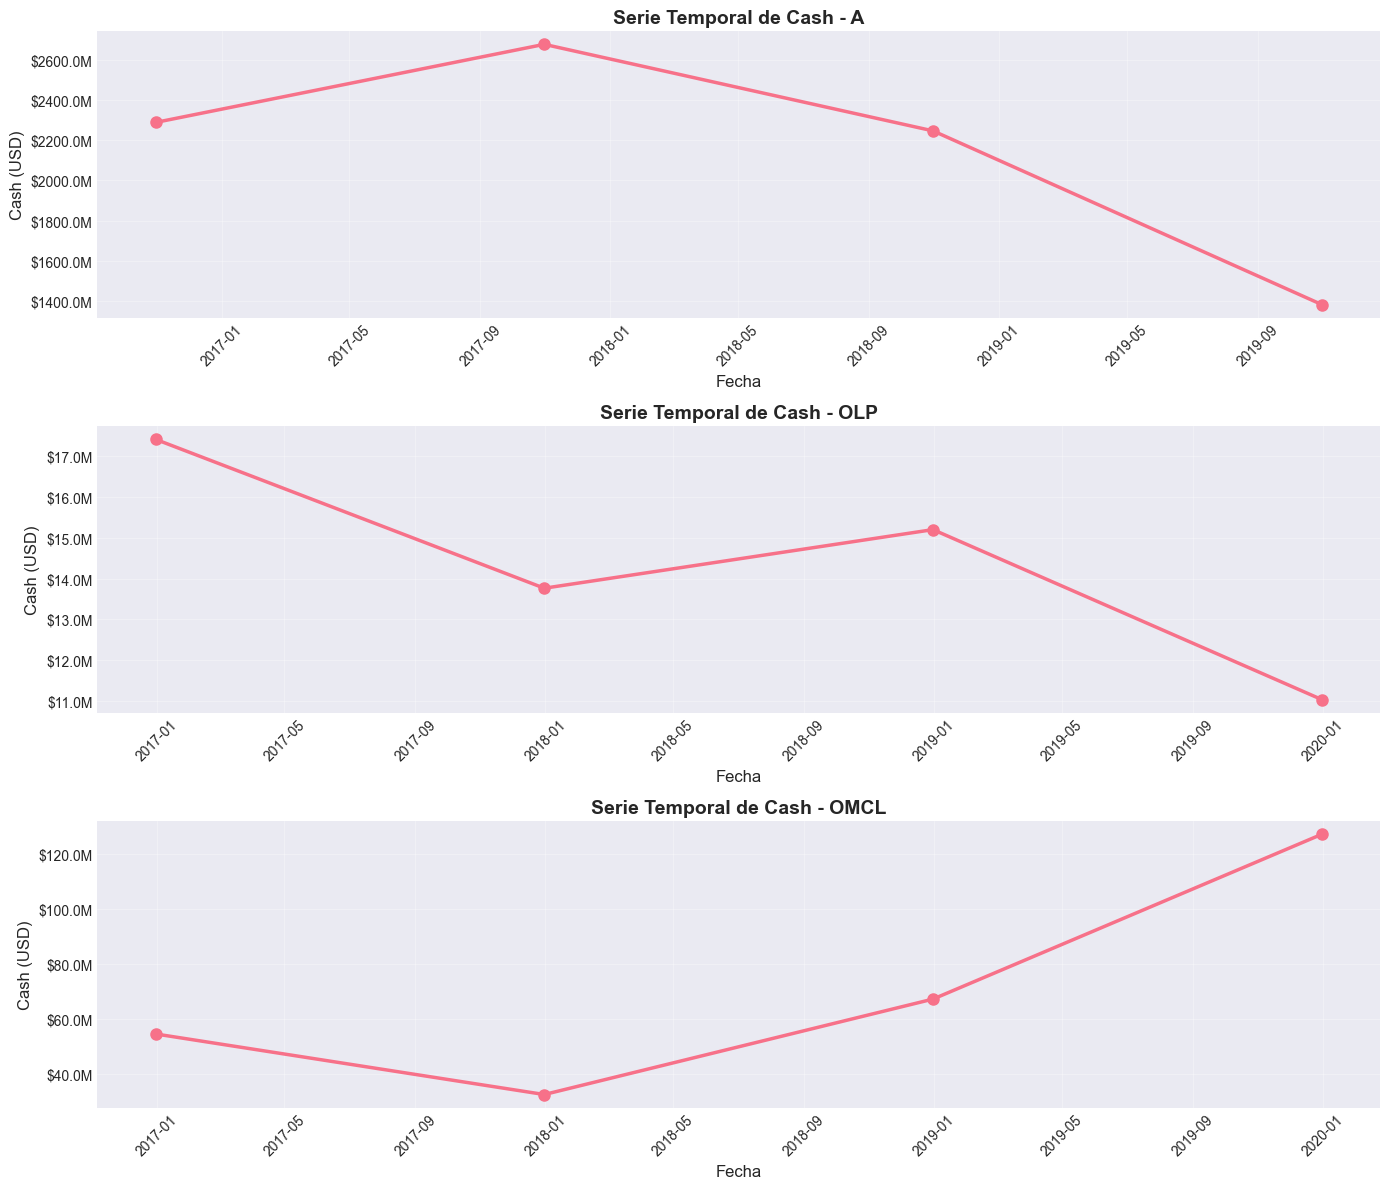

In [5]:
print("="*60)
print("PASO 4: VISUALIZACIÓN")
print("="*60)

fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for idx, stock in enumerate(selected_stocks):
    data = df_selected[df_selected['stock'] == stock].sort_values('endDate')
    
    ax = axes[idx]
    ax.plot(data['endDate'], data['cash'], marker='o', linewidth=2.5, markersize=8)
    ax.set_title(f'Serie Temporal de Cash - {stock}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Fecha', fontsize=12)
    ax.set_ylabel('Cash (USD)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Formatear eje Y
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

plt.tight_layout()
plt.savefig('cash_series.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfica guardada: cash_series.png")
plt.show()

## Paso 5: División 80/20 (train/test)

In [6]:
print("="*60)
print("PASO 5: DIVISIÓN 80/20")
print("="*60)

train_data = {}
test_data = {}

for stock in selected_stocks:
    data = df_selected[df_selected['stock'] == stock].sort_values('endDate').reset_index(drop=True)
    
    split_idx = int(len(data) * 0.8)
    train_data[stock] = data.iloc[:split_idx].copy()
    test_data[stock] = data.iloc[split_idx:].copy()
    
    print(f"\n{stock}:")
    print(f"  Train: {len(train_data[stock])} obs")
    print(f"  Test: {len(test_data[stock])} obs")

print("\n✓ División completada (sin shuffle)")

PASO 5: DIVISIÓN 80/20

A:
  Train: 3 obs
  Test: 1 obs

OLP:
  Train: 3 obs
  Test: 1 obs

OMCL:
  Train: 3 obs
  Test: 1 obs

✓ División completada (sin shuffle)


## Paso 6: Entrenar modelos de regresión lineal

In [7]:
print("="*60)
print("PASO 6: ENTRENAMIENTO")
print("="*60)

models = {}
predictions = {}

for stock in selected_stocks:
    print(f"\nEntrenando {stock}...")
    
    train = train_data[stock].copy()
    test = test_data[stock].copy()
    
    # Crear features
    train['days'] = (train['endDate'] - train['endDate'].min()).dt.days
    test['days'] = (test['endDate'] - train['endDate'].min()).dt.days
    train['year'] = train['endDate'].dt.year
    test['year'] = test['endDate'].dt.year
    train['month'] = train['endDate'].dt.month
    test['month'] = test['endDate'].dt.month
    
    # Preparar X, y
    features = ['days', 'year', 'month']
    X_train = train[features]
    y_train = train['cash']
    X_test = test[features]
    y_test = test['cash']
    
    # Entrenar
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predecir
    y_pred = model.predict(X_test)
    
    # Guardar
    models[stock] = model
    predictions[stock] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'dates': test['endDate']
    }
    
    print(f"  ✓ R² train: {model.score(X_train, y_train):.4f}")

print("\n✓ Todos los modelos entrenados")

PASO 6: ENTRENAMIENTO

Entrenando A...
  ✓ R² train: 0.0078

Entrenando OLP...
  ✓ R² train: 0.3623

Entrenando OMCL...
  ✓ R² train: 0.1304

✓ Todos los modelos entrenados


## Paso 7: Graficar real vs predicho

PASO 7: REAL VS PREDICHO

✓ Gráfica guardada: real_vs_pred.png


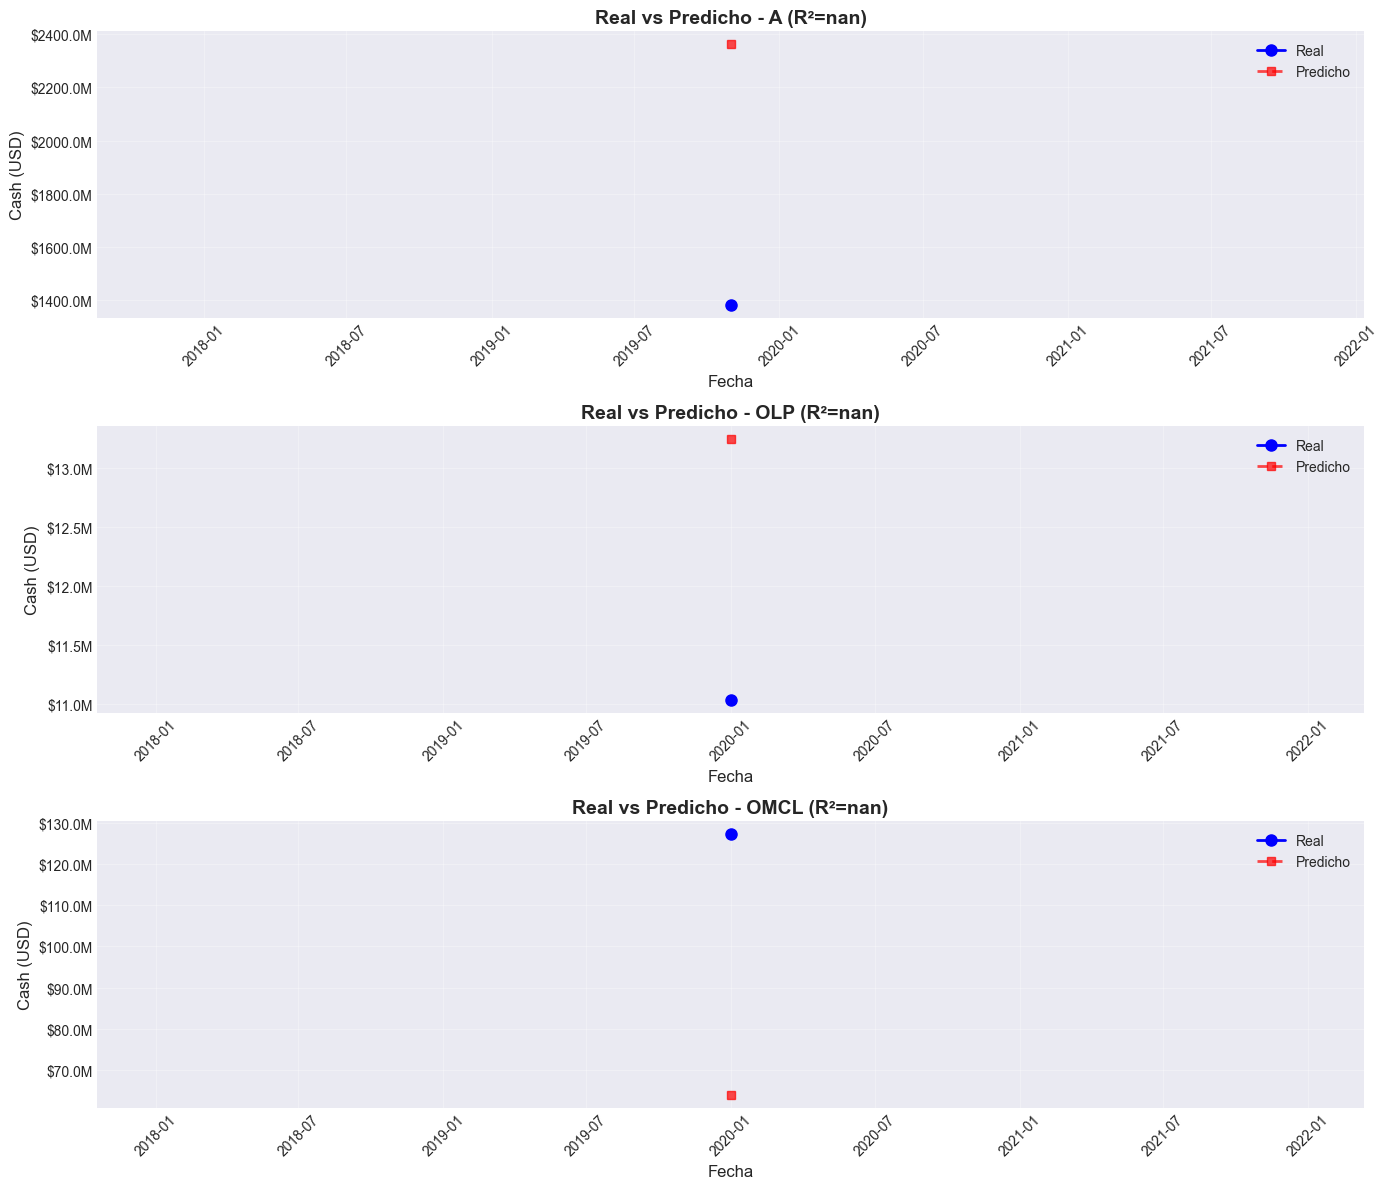

In [8]:
print("="*60)
print("PASO 7: REAL VS PREDICHO")
print("="*60)

fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for idx, stock in enumerate(selected_stocks):
    pred = predictions[stock]
    
    ax = axes[idx]
    ax.plot(pred['dates'], pred['y_test'], marker='o', linewidth=2, 
            markersize=8, label='Real', color='blue')
    ax.plot(pred['dates'], pred['y_pred'], marker='s', linewidth=2, 
            markersize=6, label='Predicho', color='red', linestyle='--', alpha=0.7)
    
    r2 = r2_score(pred['y_test'], pred['y_pred'])
    ax.set_title(f'Real vs Predicho - {stock} (R²={r2:.4f})', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel('Fecha', fontsize=12)
    ax.set_ylabel('Cash (USD)', fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

plt.tight_layout()
plt.savefig('real_vs_pred.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfica guardada: real_vs_pred.png")
plt.show()

## Paso 8: Métricas (MSE, RMSE, R²)

PASO 8: MÉTRICAS

A:
  MSE:  $961,707,111,111,110,784
  RMSE: $980,666,667
  R²:   nan
  MAE:  $980,666,667

OLP:
  MSE:  $4,898,844,444,444
  RMSE: $2,213,333
  R²:   nan
  MAE:  $2,213,333

OMCL:
  MSE:  $3,986,407,044,000,002
  RMSE: $63,138,000
  R²:   nan
  MAE:  $63,138,000

RESUMEN


,Stock,MSE,RMSE,R²,MAE
0,A,9.617071e+17,9.806667e+08,NaN,9.806667e+08
1,OLP,4.898844e+12,2.213333e+06,NaN,2.213333e+06
2,OMCL,3.986407e+15,6.313800e+07,NaN,6.313800e+07



✓ Gráfica guardada: metricas.png


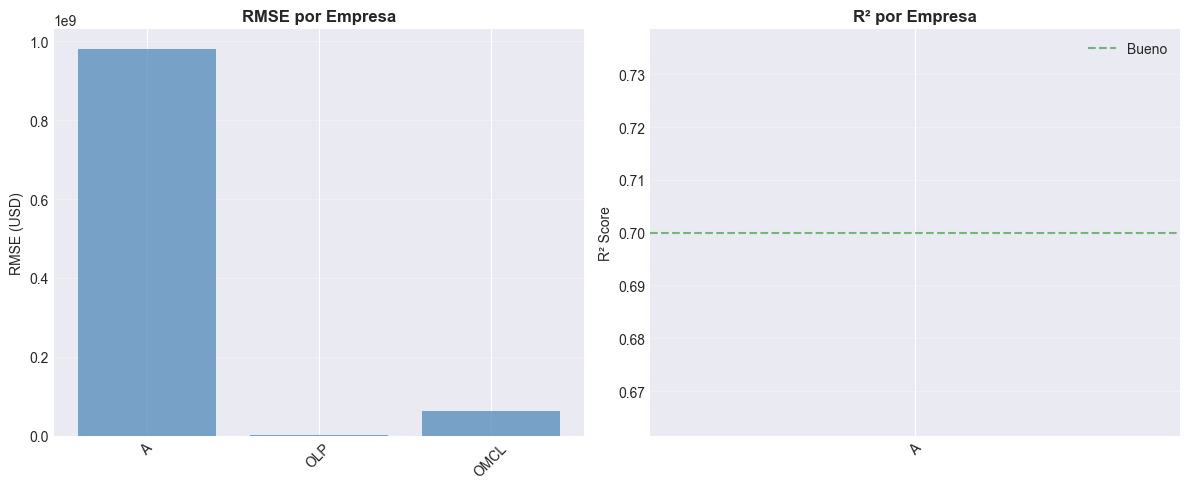


ANÁLISIS COMPLETADO


In [9]:
print("="*60)
print("PASO 8: MÉTRICAS")
print("="*60)

results = []

for stock in selected_stocks:
    pred = predictions[stock]
    
    mse = mean_squared_error(pred['y_test'], pred['y_pred'])
    rmse = np.sqrt(mse)
    r2 = r2_score(pred['y_test'], pred['y_pred'])
    mae = mean_absolute_error(pred['y_test'], pred['y_pred'])
    
    results.append({
        'Stock': stock,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAE': mae
    })
    
    print(f"\n{stock}:")
    print(f"  MSE:  ${mse:,.0f}")
    print(f"  RMSE: ${rmse:,.0f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAE:  ${mae:,.0f}")

# Tabla resumen
results_df = pd.DataFrame(results)
print("\n" + "="*60)
print("RESUMEN")
print("="*60)
display(results_df)

# Gráfica comparativa
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(results_df['Stock'], results_df['RMSE'], color='steelblue', alpha=0.7)
axes[0].set_title('RMSE por Empresa', fontweight='bold')
axes[0].set_ylabel('RMSE (USD)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(results_df['Stock'], results_df['R²'], color='coral', alpha=0.7)
axes[1].set_title('R² por Empresa', fontweight='bold')
axes[1].set_ylabel('R² Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=0.7, color='green', linestyle='--', alpha=0.5, label='Bueno')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('metricas.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfica guardada: metricas.png")
plt.show()

print("\n" + "="*60)
print("ANÁLISIS COMPLETADO")
print("="*60)